In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.textpath import TextPath
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram

In [2]:
df = pd.read_csv('../dataset/complete_dataset.csv')
#dfs is the original dataframe without slicing, since df would be used as a sliced dataframe later on 
dfs = df.sample(frac=1)
dfs.shape


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,3,5,6,7,8,9,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(10927181, 19)

## Visualisation of the Dataframe

### **Original Dataframe**

In [3]:
print(dfs.shape)
dfs.head()

(10927181, 19)


,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
9777894,NaN,NaN,tt8435494,NaN,NaN,NaN,NaN,NaN,nm1767139,"nm1463759,nm1767139",tvMiniSeries,Hell Parade,Hell Parade,0.0,2018.0,2018.0,NaN,NaN,NaN
8230445,NaN,NaN,tt6350458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,Episode dated 3 January 2010,Episode dated 3 January 2010,0.0,2010.0,NaN,NaN,NaN,NaN
7709731,NaN,NaN,tt5634552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,Episode #1.16,Episode #1.16,0.0,2003.0,NaN,NaN,NaN,NaN
3521646,NaN,NaN,tt12110318,NaN,NaN,NaN,NaN,NaN,nm8747566,nm8747566,short,Broken,Broken,0.0,2014.0,NaN,7,NaN,NaN
5067883,NaN,NaN,tt2141686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,The Poll Tax - Fair and Workable?,The Poll Tax - Fair and Workable?,0.0,1987.0,NaN,NaN,NaN,NaN


### **Dataframe without NaN in text, genre, year and production_region**

In [4]:
df.dropna(subset=['text', 'genre', 'year', 'production_region'], inplace=True)
df.drop_duplicates(subset=['IMDB_ID'], inplace=True)
print(df.shape)
df.head()

(11557, 19)


,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
109,3653850.xml,[ Subtitles by Subturtles ] Du sollst nach Hau...,tt1175,"Drama,Romance",1912.0,French,untokenisiert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,6581015.xml,HINTER DER LEIWAND Die Anwendung für die Arbei...,tt6414,"Comedy,Romance,Short",1916.0,English,untokenisiert,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,6564964.xml,DER GRAF Maße : Hals 30 cm - Ohr - 4 cm Mounth...,tt6548,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,6412883.xml,"Chaplin bei der Feuerwehr "" Lass doch das Haus...",tt6684,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,6565009.xml,Der Abenteurer Der Mann Jagd . Ein morgendlich...,tt7613,"Comedy,Short",1917.0,English,untokenisiert,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot Production 

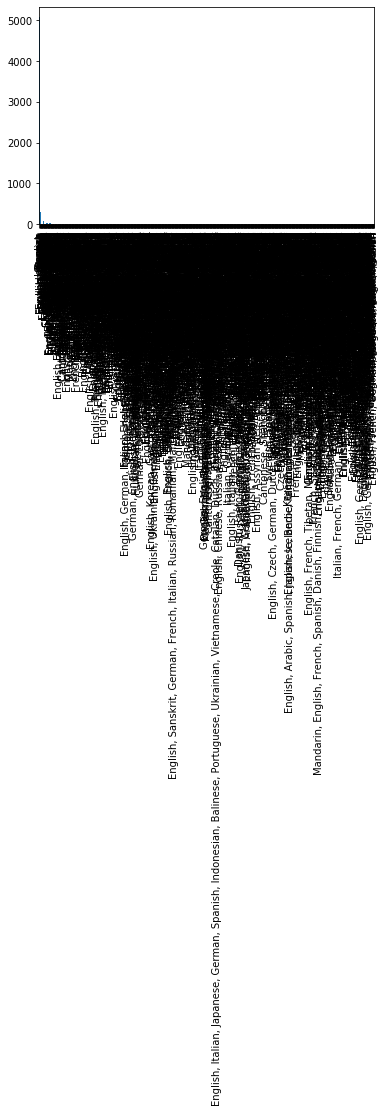

In [5]:
pd.value_counts(df['production_region']).plot.bar()

# Plot Main Country (the first country mentioned on each rows)

In [22]:
df['main_country'] = df.production_region.str.split(',')
main = df['main_country']
main_country = main.apply(lambda x: x[0])
df['main_country'] = main_country
df[df['production_region'].str.contains(" Old")]


,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,main_country
17204,116716.xml,DER HERR DER RINGE DIE ZWEI TÜRME SPECIAL EXTE...,tt167261,"Action,Adventure,Drama",2002.0,"English, Sindarin, Old English",untokenisiert,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
18136,226752.xml,Der Herr der Ringe Sméagol ! Ich hab einen ! I...,tt167260,"Adventure,Drama,Fantasy",2003.0,"English, Quenya, Old English, Sindarin",untokenisiert,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
23661,6858525.xml,Hrothgar ! Hrothgar ! Hrothgar ! Ich will Met ...,tt442933,"Action,Adventure,Animation",2007.0,"English, Old English",untokenisiert,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
27121,4994297.xml,Outlander ( 2008 ) dTV - kabel eins - 6. April...,tt462465,"Action,Adventure,Sci-Fi",2008.0,"English, Norse, Old, Latin",untokenisiert,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English


In [7]:
df.main_country

109       French
110      English
111      English
113      English
116      English
          ...   
59644    English
59646    English
59654    English
59664    English
59666    English
Name: main_country, Length: 11557, dtype: object

In [8]:
df.main_country.unique()
print(df.main_country.unique())
len(df.main_country.unique())

['French' 'English' 'Swedish' 'German' 'Slovak' 'Russian' 'Polish'
 'Spanish' 'Portuguese' 'Czech' 'Danish' 'Croatian' 'Italian' 'Japanese'
 'Swiss German' 'Romanian' 'Georgian' 'Dutch' 'Turkish' 'Bulgarian'
 'Ukrainian' 'Mandarin' 'Urdu' 'Estonian' 'Hebrew' 'Serbo-Croatian'
 'Greek' 'Norwegian' 'Korean' 'Cantonese' 'Finnish' 'Arabic' 'Icelandic'
 'Serbian' 'Belarusian' 'Saami' 'Scanian' 'Bambara' 'Azerbaijani'
 'Hungarian' 'Afrikaans' 'Faroese' 'Lithuanian' 'Hindi' 'More'
 'Vietnamese' 'Bosnian' 'Persian' 'Romany' 'Khmer' 'Tamil' 'Tibetan'
 'Catalan' 'Kurdish' 'Thai' 'Wolof' 'Aboriginal' 'Slovenian' 'Dari'
 'Aramaic' 'Panjabi' 'Kazakh' 'Mongolian' 'Zulu' 'Maya' 'Hokkien'
 'Flemish' 'Filipino' 'Kirghiz' 'Irish' 'Inupiaq' 'Min Nan' 'Neapolitan'
 'Indonesian' 'Chinese' 'Greenlandic' 'Ladakhi' 'Albanian' 'Malay'
 'Inuktitut' 'Maori' 'Telugu']


82

In [9]:
from collections import Counter
main_country_frequs = Counter(df.main_country)
print('There are', len(main_country_frequs), 'main Countries where the Movies are produced')
main_country_frequs.most_common(20)

There are 82 main Countries where the Movies are produced


[('English', 6862),
 ('French', 1109),
 ('German', 981),
 ('Japanese', 471),
 ('Italian', 391),
 ('Spanish', 211),
 ('Cantonese', 167),
 ('Korean', 152),
 ('Mandarin', 151),
 ('Swedish', 144),
 ('Russian', 118),
 ('Danish', 83),
 ('Norwegian', 80),
 ('Turkish', 67),
 ('Dutch', 66),
 ('Polish', 45),
 ('Thai', 45),
 ('Hindi', 43),
 ('Czech', 38),
 ('Icelandic', 36)]

**Main Country Plot**

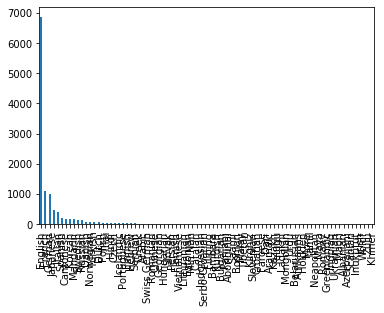

In [10]:
pd.value_counts(df['main_country']).plot.bar()


# Production Region

In [11]:
df.production_region.unique()
print(df.production_region.unique())

['French' 'English' 'Swedish' ... 'Chinese, English'
 'Spanish, English, Icelandic, Portuguese' 'Hebrew, English, Persian']


In [12]:
from collections import Counter
region_combination_frequs = Counter(df.production_region)
region_combination_frequs.most_common(20)

[('English', 5082),
 ('French', 799),
 ('German', 780),
 ('Japanese', 398),
 ('Italian', 306),
 ('English, Spanish', 252),
 ('English, French', 207),
 ('Spanish', 154),
 ('Korean', 119),
 ('English, German', 98),
 ('Mandarin', 95),
 ('Russian', 91),
 ('Swedish', 87),
 ('French, English', 82),
 ('English, Italian', 79),
 ('Cantonese', 79),
 ('English, Russian', 75),
 ('English, Japanese', 63),
 ('Turkish', 57),
 ('Danish', 52)]

In [13]:
region = df.production_region
region.head(30)

109             French
110            English
111            English
113            English
116            English
117            English
118            English
119            English
121            Swedish
123             German
125            English
127            Swedish
128             German
129            English
131             Slovak
132             German
133    Swedish, Danish
137             French
140            Russian
142            English
145            English
146            English
148             French
150            English
153            English
154             French
155            English
156            English
157             German
158            English
Name: production_region, dtype: object

In [15]:
#to find out the out the country names so we can tailor the language-continent dataframe
production_countries = []
for prod_country in df.production_region.unique():
    sign_languages = prod_country.replace ('Sign Languages', 'uncategorised')
    sign_language = sign_languages.replace (' Sign Language', '')
    language = sign_language.replace(' languages', '')
    each_country = language.split(', ')
    production_countries = production_countries + each_country
print('Number of countries mentioned in the Dataset: ', len(production_countries))
print(production_countries)    



Number of countries mentioned in the Dataset:  4082
['French', 'English', 'Swedish', 'German', 'Slovak', 'Swedish', 'Danish', 'Russian', 'Polish', 'German', 'English', 'English', 'French', 'Spanish', 'Arabic', 'Italian', 'Spanish', 'English', 'Hungarian', 'Latin', 'Spanish', 'Hungarian', 'English', 'Latin', 'Portuguese', 'English', 'German', 'French', 'English', 'Russian', 'English', 'Arabic', 'French', 'English', 'French', 'Cantonese', 'German', 'English', 'Italian', 'Russian', 'Spanish', 'German', 'English', 'Spanish', 'English', 'German', 'Italian', 'English', 'French', 'English', 'Polynesian', 'English', 'Italian', 'English', 'Cantonese', 'Latin', 'English', 'German', 'English', 'Arabic', 'Czech', 'English', 'Portuguese', 'French', 'German', 'English', 'Russian', 'English', 'Mandarin', 'English', 'Hebrew', 'French', 'English', 'English', 'German', 'French', 'Italian', 'English', 'Latin', 'German', 'English', 'Esperanto', 'English', 'Welsh', 'English', 'French', 'German', 'Italian',

In [17]:
a = []
for y in production_countries:
    if y not in a:
        a.append(y)
print(len(a))
print(a)


167
['French', 'English', 'Swedish', 'German', 'Slovak', 'Danish', 'Russian', 'Polish', 'Spanish', 'Arabic', 'Italian', 'Hungarian', 'Latin', 'Portuguese', 'Cantonese', 'Polynesian', 'Czech', 'Mandarin', 'Hebrew', 'Esperanto', 'Welsh', 'Serbian', 'Indonesian', 'Greek', 'Croatian', 'Nahuatl', 'Swahili', 'Japanese', 'Hindi', 'Swiss German', 'Athapascan', 'Romanian', 'Georgian', 'Navajo', 'Thai', 'American', 'Chinese', 'Dutch', 'Turkish', 'Arapaho', 'Romany', 'Bulgarian', 'Zulu', 'Ukrainian', 'Norwegian', 'Malay', 'Tatar', 'Urdu', 'Mongolian', 'Vietnamese', 'Estonian', 'Korean', 'Sioux', 'Neapolitan', 'Yiddish', 'Serbo-Croatian', 'Apache', 'Burmese', 'Creoles and pidgins', ' Ancient (to 1453)', 'Irish', 'Sicilian', 'Icelandic', 'Brazilian', 'Aboriginal', 'Armenian', 'Lithuanian', 'Maltese', 'Khmer', 'Klingon', 'Nepali', 'Filipino', 'Kurdish', 'Finnish', 'Sinhalese', 'Persian', 'Belarusian', 'Guarani', 'Dari', 'Pushto', 'Saami', 'Scanian', 'Bambara', 'Fulah', 'Azerbaijani', 'Hakka', 'Afrik

In [20]:
from collections import Counter
print(len(production_countries))
g = Counter(production_countries)
g

4082


Counter({'French': 409,
         'English': 890,
         'Swedish': 75,
         'German': 363,
         'Slovak': 12,
         'Danish': 64,
         'Russian': 183,
         'Polish': 51,
         'Spanish': 229,
         'Arabic': 99,
         'Italian': 197,
         'Hungarian': 33,
         'Latin': 70,
         'Portuguese': 50,
         'Cantonese': 94,
         'Polynesian': 1,
         'Czech': 28,
         'Mandarin': 118,
         'Hebrew': 53,
         'Esperanto': 3,
         'Welsh': 3,
         'Serbian': 25,
         'Indonesian': 11,
         'Greek': 44,
         'Croatian': 7,
         'Nahuatl': 1,
         'Swahili': 12,
         'Japanese': 136,
         'Hindi': 34,
         'Swiss German': 16,
         'Athapascan': 1,
         'Romanian': 20,
         'Georgian': 13,
         'Navajo': 2,
         'Thai': 32,
         'American': 5,
         'Chinese': 26,
         'Dutch': 37,
         'Turkish': 39,
         'Arapaho': 1,
         'Romany': 3,
         'Bul

KeyError: 'production_countries'

In [23]:
df['production_country'] = df.production_region
reg = df['production_country']
df.head()

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,...,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,main_country,production_country
109,3653850.xml,[ Subtitles by Subturtles ] Du sollst nach Hau...,tt1175,"Drama,Romance",1912.0,French,untokenisiert,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,French
110,6581015.xml,HINTER DER LEIWAND Die Anwendung für die Arbei...,tt6414,"Comedy,Romance,Short",1916.0,English,untokenisiert,30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English
111,6564964.xml,DER GRAF Maße : Hals 30 cm - Ohr - 4 cm Mounth...,tt6548,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English
113,6412883.xml,"Chaplin bei der Feuerwehr "" Lass doch das Haus...",tt6684,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English
116,6565009.xml,Der Abenteurer Der Mann Jagd . Ein morgendlich...,tt7613,"Comedy,Short",1917.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English


number of countries without sign languages(filtered):  167
['French', 'English', 'Swedish', 'German', 'Slovak', 'Danish', 'Russian', 'Polish', 'Spanish', 'Arabic', 'Italian', 'Hungarian', 'Latin', 'Portuguese', 'Cantonese', 'Polynesian', 'Czech', 'Mandarin', 'Hebrew', 'Esperanto', 'Welsh', 'Serbian', 'Indonesian', 'Greek', 'Croatian', 'Nahuatl', 'Swahili', 'Japanese', 'Hindi', 'Swiss German', 'Athapascan', 'Romanian', 'Georgian', 'Navajo', 'Thai', 'American', 'Chinese', 'Dutch', 'Turkish', 'Arapaho', 'Romany', 'Bulgarian', 'Zulu', 'Ukrainian', 'Norwegian', 'Malay', 'Tatar', 'Urdu', 'Mongolian', 'Vietnamese', 'Estonian', 'Korean', 'Sioux', 'Neapolitan', 'Yiddish', 'Serbo-Croatian', 'Apache', 'Burmese', 'Creoles and pidgins', ' Ancient (to 1453)', 'Irish', 'Sicilian', 'Icelandic', 'Brazilian', 'Aboriginal', 'Armenian', 'Lithuanian', 'Maltese', 'Khmer', 'Klingon', 'Nepali', 'Filipino', 'Kurdish', 'Finnish', 'Sinhalese', 'Persian', 'Belarusian', 'Guarani', 'Dari', 'Pushto', 'Saami', 'Scani

**Country to Continent conversion**

In [33]:
continent = pd.read_csv('../dataset/continent_languages.csv')
continent.head()

,north_america,south_america,europe,africa,asia,australia,antartica,uncategorised
0,English,nahuatl,bulgaria,Swahli,russian,Aboriginal,NaN,esperanto
1,Athapascan,Brazilian,croatian,Zulu,arabic,NaN,NaN,latin
2,Sioux,Guarani,czech,Bambara,cantonese,NaN,NaN,Creoles and pidgins
3,Apache,Aymara,danish,Fulah,polynesian,NaN,NaN,Ancient (to 1453)
4,Pawnee,Quechua,dutch,Afrikaans,mandarin,NaN,NaN,Klingon


**North America**

In [60]:
north_america = continent['north_america']
df['production_continent'] = df['production_country'].replace([north_america],'North America')
df.head()

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,...,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,main_country,production_country,production_continent
109,3653850.xml,[ Subtitles by Subturtles ] Du sollst nach Hau...,tt1175,"Drama,Romance",1912.0,French,untokenisiert,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,French,French
110,6581015.xml,HINTER DER LEIWAND Die Anwendung für die Arbei...,tt6414,"Comedy,Romance,Short",1916.0,English,untokenisiert,30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English,North America
111,6564964.xml,DER GRAF Maße : Hals 30 cm - Ohr - 4 cm Mounth...,tt6548,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English,North America
113,6412883.xml,"Chaplin bei der Feuerwehr "" Lass doch das Haus...",tt6684,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English,North America
116,6565009.xml,Der Abenteurer Der Mann Jagd . Ein morgendlich...,tt7613,"Comedy,Short",1917.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English,North America


**South America**

In [45]:
south_america = continent['south_america']
df['production_continent'] = df['production_country'].replace([south_america],'South America')


**Europe**

In [61]:
europe = continent['europe']
df['production_continent'] = df['production_country'].replace([europe],'Europe')
df.head()

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,...,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,main_country,production_country,production_continent
109,3653850.xml,[ Subtitles by Subturtles ] Du sollst nach Hau...,tt1175,"Drama,Romance",1912.0,French,untokenisiert,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,French,Europe
110,6581015.xml,HINTER DER LEIWAND Die Anwendung für die Arbei...,tt6414,"Comedy,Romance,Short",1916.0,English,untokenisiert,30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English,English
111,6564964.xml,DER GRAF Maße : Hals 30 cm - Ohr - 4 cm Mounth...,tt6548,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English,English
113,6412883.xml,"Chaplin bei der Feuerwehr "" Lass doch das Haus...",tt6684,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English,English
116,6565009.xml,Der Abenteurer Der Mann Jagd . Ein morgendlich...,tt7613,"Comedy,Short",1917.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English,English


**Africa**

In [46]:
africa = continent['africa']
df['production_continent'] = df['production_country'].replace([africa],'Africa')


**Asia**

In [47]:
asia = continent['asia']
df['production_continent'] = df['production_country'].replace([asia],'Asia')

**Australia**

In [48]:
australia = continent['australia']
df['production_continent'] = df['production_country'].replace([australia],'Australia')

**Antartica**

In [49]:
antartica = continent['antartica']
df['production_continent'] = df['production_country'].replace([antartica],'Antratica')

**Uncategorized**

In [51]:
uncategorised = continent['uncategorised']
df['production_continent'] = df['production_country'].replace([uncategorised],'Uncategorised')

In [58]:
df[df['production_continent'].str.contains('French')]

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,...,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,main_country,production_country,production_continent
109,3653850.xml,[ Subtitles by Subturtles ] Du sollst nach Hau...,tt1175,"Drama,Romance",1912.0,French,untokenisiert,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,French,French
137,4980988.xml,1923 produzierte Henri Diamant-Berger den erst...,tt15214,"Sci-Fi,Short",1924.0,French,untokenisiert,35,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,French,French
148,3654510.xml,"KINDERGESICHTER Saint-Luc , ein Dorf im Oberwa...",tt16491,"Drama,Mystery,Romance",1925.0,French,untokenisiert,114,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,French,French
154,4773977.xml,DIE IMAGINÄRE REISE von Renè Clair ( 1925 ) Ei...,tt16493,"Comedy,Drama,Fantasy",1926.0,French,untokenisiert,80,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,French,French
192,4630720.xml,DIE PASSION DER JUNGFRAU VON ORLEANS Ein Film ...,tt19254,"Biography,Drama,History",1928.0,French,untokenisiert,110,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,French,French
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51853,6716274.xml,Wenn Sie gestatten ... Ihr Arzt hat Ihnen gera...,tt3811986,"Comedy,Romance",2015.0,French,untokenisiert,97,nm0025534,"nm0025534,nm1909070",...,Une famille à louer,0.0,2015.0,NaN,97,5.5,1681.0,French,French,French
51903,6696047.xml,"Es war das Jahr , an das sich alle erinnerten ...",tt3838728,Drama,2015.0,French,untokenisiert,98,nm0404067,nm0404067,...,Bang Gang (une histoire d'amour moderne),0.0,2015.0,NaN,98,5.5,2455.0,French,French,French
51923,6449999.xml,"Liebe Freunde , kommt bitte näher . Nizza , Ma...",tt3851836,"Biography,History",2015.0,French,untokenisiert,93,nm0845353,"nm0727936,nm0693506,nm0782557,nm0845353",...,"Arletty, une passion coupable",0.0,2015.0,NaN,93,6.2,173.0,French,French,French
55452,6977850.xml,"La Fripouille , nicht trödeln . Ich eile , Mes...",tt2441982,"Comedy,Fantasy",2016.0,French,untokenisiert,110,nm0688585,"nm0002010,nm0688585",...,Les visiteurs: La révolution,0.0,2016.0,NaN,110,4.5,3343.0,French,French,French


In [ ]:
df['production_country'] = production_countries

In [ ]:
#df['production_country'] = production_country
df.head(30)

In [ ]:
df.production_country

# Each country mentioned once

In [ ]:
print(new_countries)

In [ ]:
type(filtered_country)

# Clustering über Regionen mit Embeddings


In [ ]:
from pathlib import Path
import numpy as np
def read_embeddings(embedding_file: str):
    data = Path(embedding_file).read_text()
    lines = data.split('\n')
    filenames = []
    embeddings = []
    for line in lines:
        line_data = line.split(' ')
        if len(line_data) >=2 :
            filenames.append(line_data[0])
            embeddings.append(list(map(float, line_data[1:])))
    return np.asarray(filenames), np.asarray(embeddings)

In [ ]:
filenames, embeddings = read_embeddings('../dataset/embeddings_mean.txt')

In [ ]:
filenames.shape, embeddings.shape

In [ ]:
df = df[df['filename'].isin(filenames)].copy()
df.shape

# Split Region

In [ ]:
North_AmericaValue = 'English'
EuropeValue = 'France'
North_America = df.production_region = North_AmericaValue
Europe = df.production_region = EuropeValue
production_regions = North_AmericaValue + EuropeValue
colorlist = []

for x in df.production_region:
    if x =='English':
        colorlist.append('red')
    elif x =='French':
        colorlist.append('blue')
    else: 
        colorlist.append('white')

In [ ]:
df['labelcolor']=colorlist

In [ ]:
pd.value_counts(dfs.colors).plot.bar() 
pd.value_counts(dfs.colors)

# K-Means

In [ ]:
model = KMeans(n_clusters=2)
model.fit(embeddings)

In [ ]:
len(model.labels_)

# Split without Embedding


In [ ]:
colors = []
for x in df.production_region:
    if x =='English':
        colors.append('red')
    elif x =='French':
        colors.append('blue')
    else: 
        colors.append('white')
dfs['colors']=colors

pd.value_counts(dfs.colors).plot.bar() 
pd.value_counts(dfs.colors)
